In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from utilities.data_preprocessor import preprocess
from utilities.data_visualizer import view_train_cross

from aco_algorithm.ant_colony import Colony

## load and preprocess data

In [2]:
df = pd.read_csv('./data.csv')

In [3]:
X, Y = preprocess(df)
X

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       1.097064     -2.073335        1.269934   0.984375         1.568466   
1       1.829821     -0.353632        1.685955   1.908708        -0.826962   
2       1.579888      0.456187        1.566503   1.558884         0.942210   
3      -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4       1.750297     -1.151816        1.776573   1.826229         0.280372   
..           ...           ...             ...        ...              ...   
564     2.110995      0.721473        2.060786   2.343856         1.041842   
565     1.704854      2.085134        1.615931   1.723842         0.102458   
566     0.702284      2.045574        0.672676   0.577953        -0.840484   
567     1.838341      2.336457        1.982524   1.735218         1.525767   
568    -1.808401      1.221792       -1.814389  -1.347789        -3.112085   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0            3.283515        2.652874             2.532475       2.217515   
1           -0.487072       -0.023846             0.548144       0.001392   
2            1.052926        1.363478             2.037231       0.939685   
3            3.402909        1.915897             1.451707       2.867383   
4            0.539340        1.371011             1.428493      -0.009560   
..                ...             ...                  ...            ...   
564          0.219060        1.947285             2.320965      -0.312589   
565         -0.017833        0.693043             1.263669      -0.217664   
566         -0.038680        0.046588             0.105777      -0.809117   
567          3.272144        3.296944             2.658866       2.137194   
568         -1.150752       -1.114873            -1.261820      -0.820070   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                  2.255747  ...      1.886690      -1.359293   
1                 -0.868652  ...      1.805927      -0.369203   
2                 -0.398008  ...      1.511870      -0.023974   
3                  4.910919  ...     -0.281464       0.133984   
4                 -0.562450  ...      1.298575      -1.466770   
..                      ...  ...           ...            ...   
564               -0.931027  ...      1.901185       0.117700   
565               -1.058611  ...      1.536720       2.047399   
566               -0.895587  ...      0.561361       1.374854   
567                1.043695  ...      1.961239       2.237926   
568               -0.561032  ...     -1.410893       0.764190   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           2.303601    2.001237          1.307686           2.616665   
1           1.535126    1.890489         -0.375612          -0.430444   
2           1.347475    1.456285          0.527407           1.082932   
3          -0.249939   -0.550021          3.394275           3.893397   
4           1.338539    1.220724          0.220556          -0.313395   
..               ...         ...               ...                ...   
564         1.752563    2.015301          0.378365          -0.273318   
565         1.421940    1.494959         -0.691230          -0.394820   
566         0.579001    0.427906         -0.809587           0.350735   
567         2.303601    1.653171          1.430427           3.904848   
568        -1.432735   -1.075813         -1.859019          -1.207552   

     concavity_worst  concave points_worst  symmetry_worst  \
0           2.109526              2.296076        2.750622   
1          -0.146749              1.087084       -0.243890   
2           0.854974              1.955000        1.152255   
3           1.989588              2.175786        6.046041   
4           0.613179              0.729259       -0.868353   
..               ...                   ...             ...   
564         0.664512              1.629151       -1

In [4]:
Y

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],

epoch 0
selected paths: [25, 10, 22, 3, 28, 7, 15, 24, 17, 13, 1, 14, 26, 18, 0]

features selected: Int64Index([25, 10, 22, 3, 28, 7, 15, 24, 17, 13, 1, 14, 26, 18, 0], dtype='int64')

(398, 15)
(398, 1)
(85, 15)
(85, 1)
     compactness_worst  radius_se  perimeter_worst  area_mean  symmetry_worst  \
478          -0.338840  -0.728238        -0.751235  -0.710995        0.065106   
303          -0.953351  -0.926383        -1.087219  -0.911788       -1.112638   
155          -0.480063  -0.668325        -0.615412  -0.553431        0.343365   
186          -0.062119  -0.532258         0.951324   1.098139        0.493818   
101          -0.852841  -0.653527        -1.693361  -1.454443        0.050546   
..                 ...        ...              ...        ...             ...   
277          -0.879559  -0.277447         0.647508   1.271629       -0.539944   
9             5.112877  -0.388250        -0.286278  -0.509063        2.370444   
359          -0.950170   0.370767        -0.93739

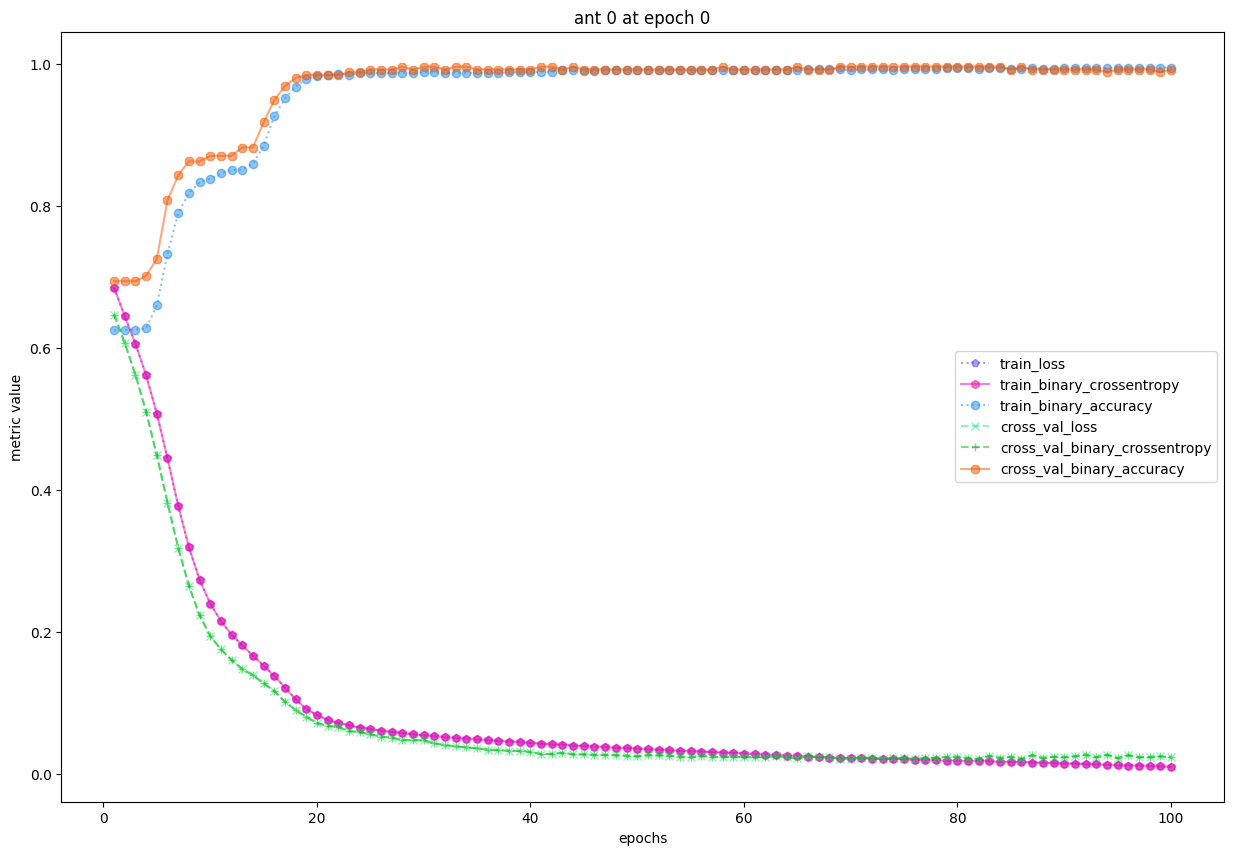

cost: 0.014606211660429837

selected paths: [13, 24, 19, 0, 25, 15, 11, 23, 7, 3, 29, 2, 1, 10, 8]

features selected: Int64Index([13, 24, 19, 0, 25, 15, 11, 23, 7, 3, 29, 2, 1, 10, 8], dtype='int64')

(398, 15)
(398, 1)
(85, 15)
(85, 1)
      area_se  smoothness_worst  fractal_dimension_se  radius_mean  \
478 -0.571980          0.124117             -0.068427    -0.749028   
303 -0.665707          0.391516             -0.180768    -1.033042   
155 -0.524236         -0.467667             -0.495851    -0.533178   
186 -0.251195         -0.393146             -1.024268     1.187949   
101 -0.671142          1.141110              0.115403    -2.029648   
..        ...               ...                   ...          ...   
277 -0.079142         -0.353694             -0.801478     1.329956   
9   -0.360764          2.320295              2.377346    -0.473535   
359 -0.216873          0.040829             -0.409232    -1.332393   
192 -0.410268         -2.682695             -0.796939    -1.25

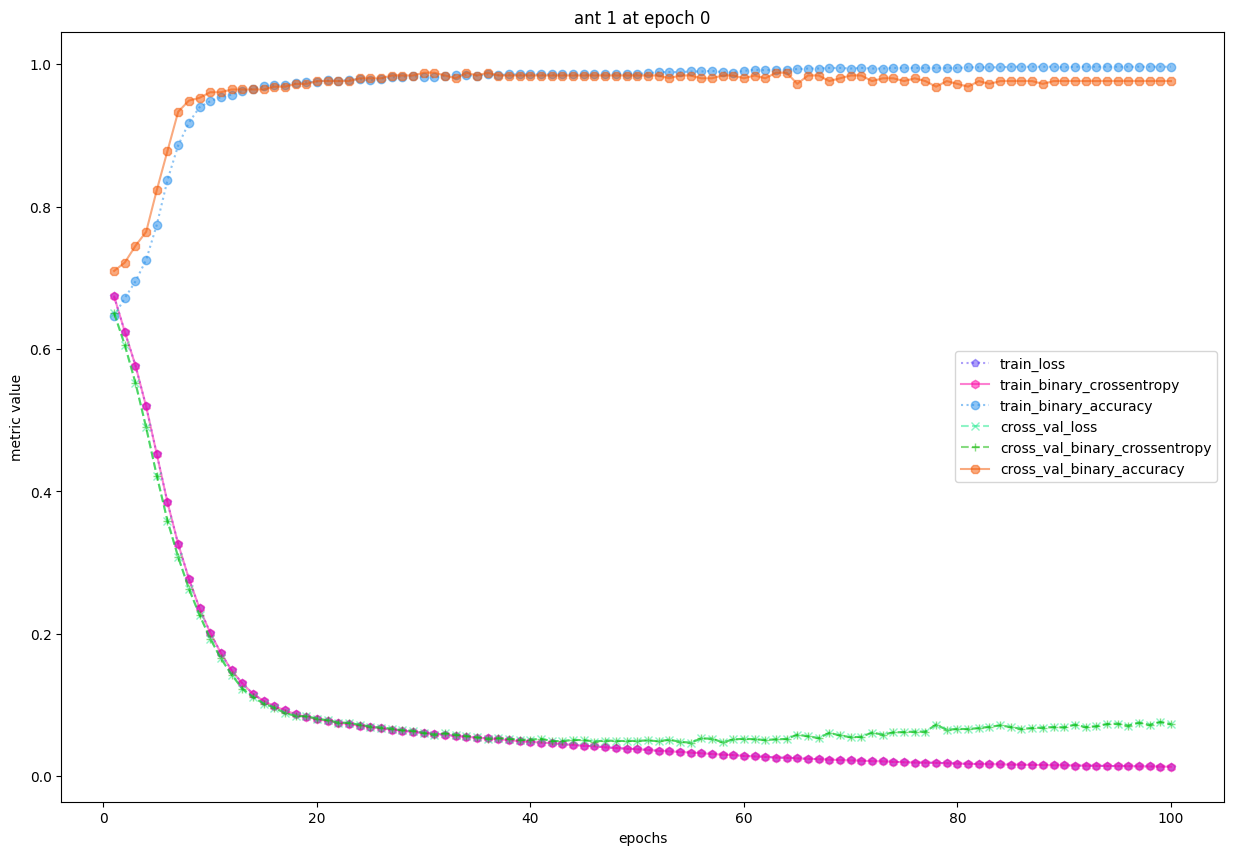

cost: 0.03132507061430564

selected paths: [29, 22, 11, 13, 17, 19, 3, 14, 26, 10, 23, 8, 15, 24, 7]

features selected: Int64Index([29, 22, 11, 13, 17, 19, 3, 14, 26, 10, 23, 8, 15, 24, 7], dtype='int64')

(398, 15)
(398, 1)
(85, 15)
(85, 1)
     fractal_dimension_worst  perimeter_worst  texture_se   area_se  \
478                 0.435246        -0.751235   -0.092266 -0.571980   
303                -0.306218        -1.087219    0.628029 -0.665707   
155                -0.145512        -0.615412   -0.425561 -0.524236   
186                -0.807177         0.951324   -1.344707 -0.251195   
101                 0.547186        -1.693361    0.528240 -0.671142   
..                       ...              ...         ...       ...   
277                -1.472721         0.647508   -0.705514 -0.079142   
9                   6.846856        -0.286278    0.693345 -0.360764   
359                -0.143295        -0.937396    0.054696 -0.216873   
192                -1.017203        -1.340697  

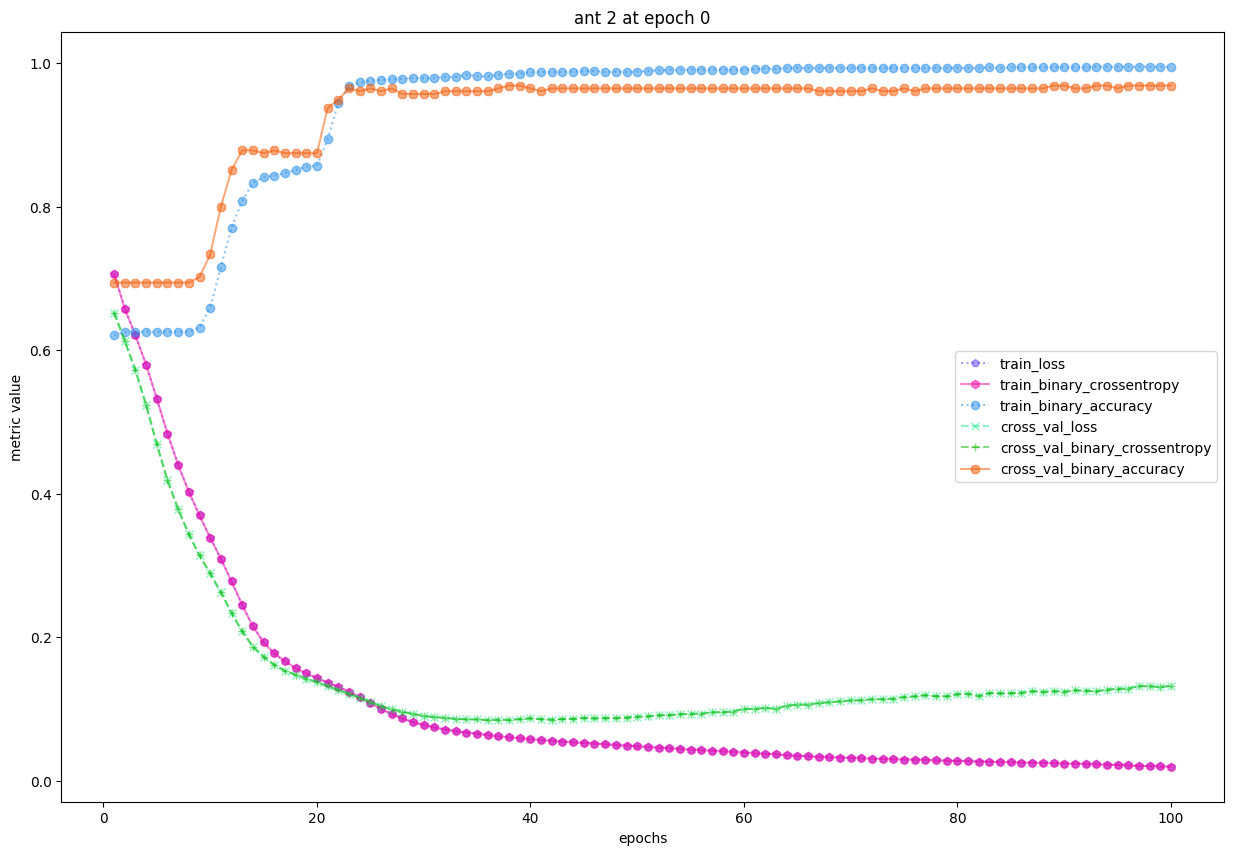

cost: 0.05345488895351688

selected paths: [8, 28, 19, 10, 18, 17, 1, 24, 20, 0, 21, 25, 15, 16, 3]

features selected: Int64Index([8, 28, 19, 10, 18, 17, 1, 24, 20, 0, 21, 25, 15, 16, 3], dtype='int64')

(398, 15)
(398, 1)
(85, 15)
(85, 1)
     symmetry_mean  symmetry_worst  fractal_dimension_se  radius_se  \
478      -0.119089        0.065106             -0.068427  -0.728238   
303      -1.203419       -1.112638             -0.180768  -0.926383   
155       0.578241        0.343365             -0.495851  -0.668325   
186      -0.695938        0.493818             -1.024268  -0.532258   
101       0.432204        0.050546              0.115403  -0.653527   
..             ...             ...                   ...        ...   
277      -0.955155       -0.539944             -0.801478  -0.277447   
9         0.797298        2.370444              2.377346  -0.388250   
359      -1.115796       -0.722753             -0.409232   0.370767   
192      -0.579108       -1.604443             -0

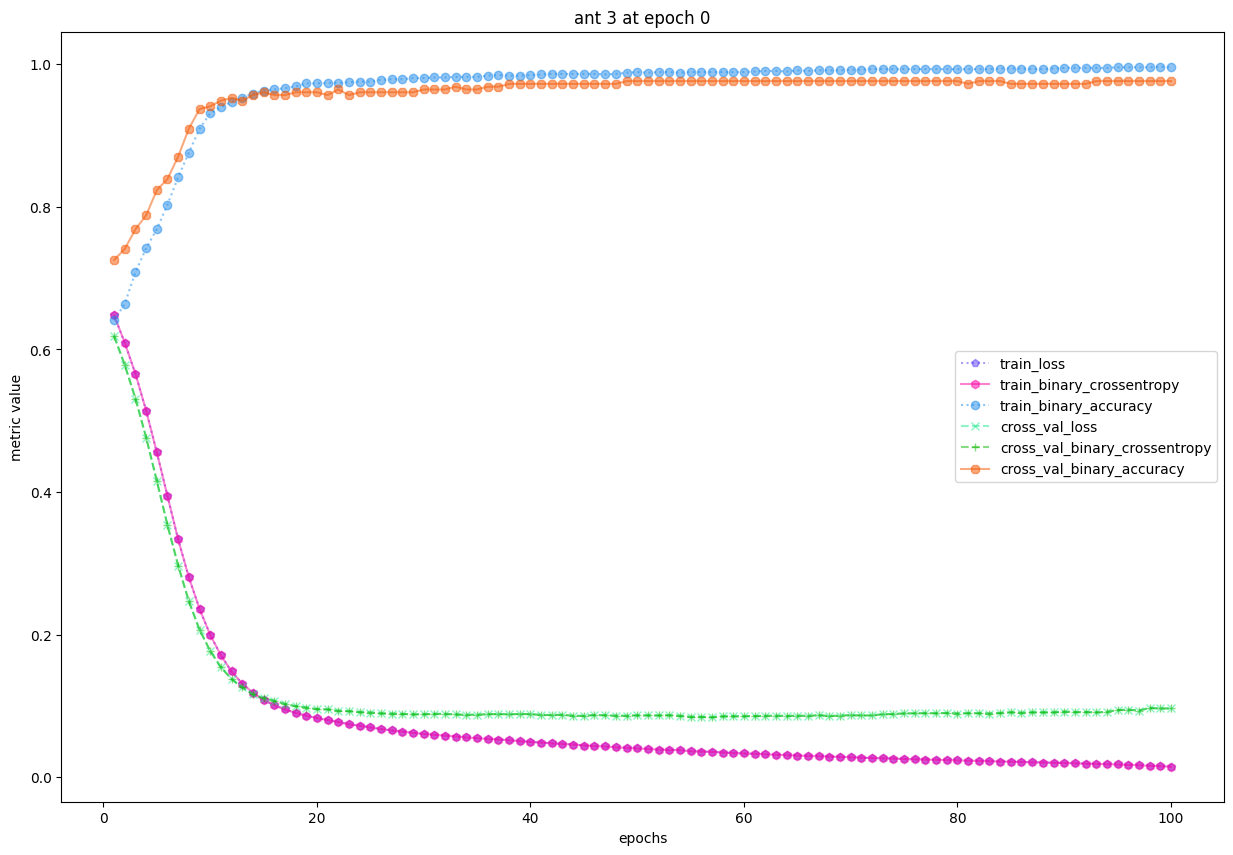

cost: 0.03911386833836636

selected paths: [18, 6, 25, 24, 4, 2, 21, 27, 15, 13, 12, 26, 11, 28, 14]

features selected: Int64Index([18, 6, 25, 24, 4, 2, 21, 27, 15, 13, 12, 26, 11, 28, 14], dtype='int64')

(398, 15)
(398, 1)
(85, 15)
(85, 1)
     symmetry_se  concavity_mean  compactness_worst  smoothness_worst  \
478    -0.255754       -0.448455          -0.338840          0.124117   
303    -0.318715       -0.826485          -0.953351          0.391516   
155    -0.309029       -0.627112          -0.480063         -0.467667   
186    -1.192902       -0.089257          -0.062119         -0.393146   
101     0.732247       -1.114873          -0.852841          1.141110   
..           ...             ...                ...               ...   
277    -0.150416       -0.107964          -0.879559         -0.353694   
9      -0.321136        1.738872           5.112877          2.320295   
359    -0.135886       -0.774633          -0.950170          0.040829   
192     2.112542       -1.1

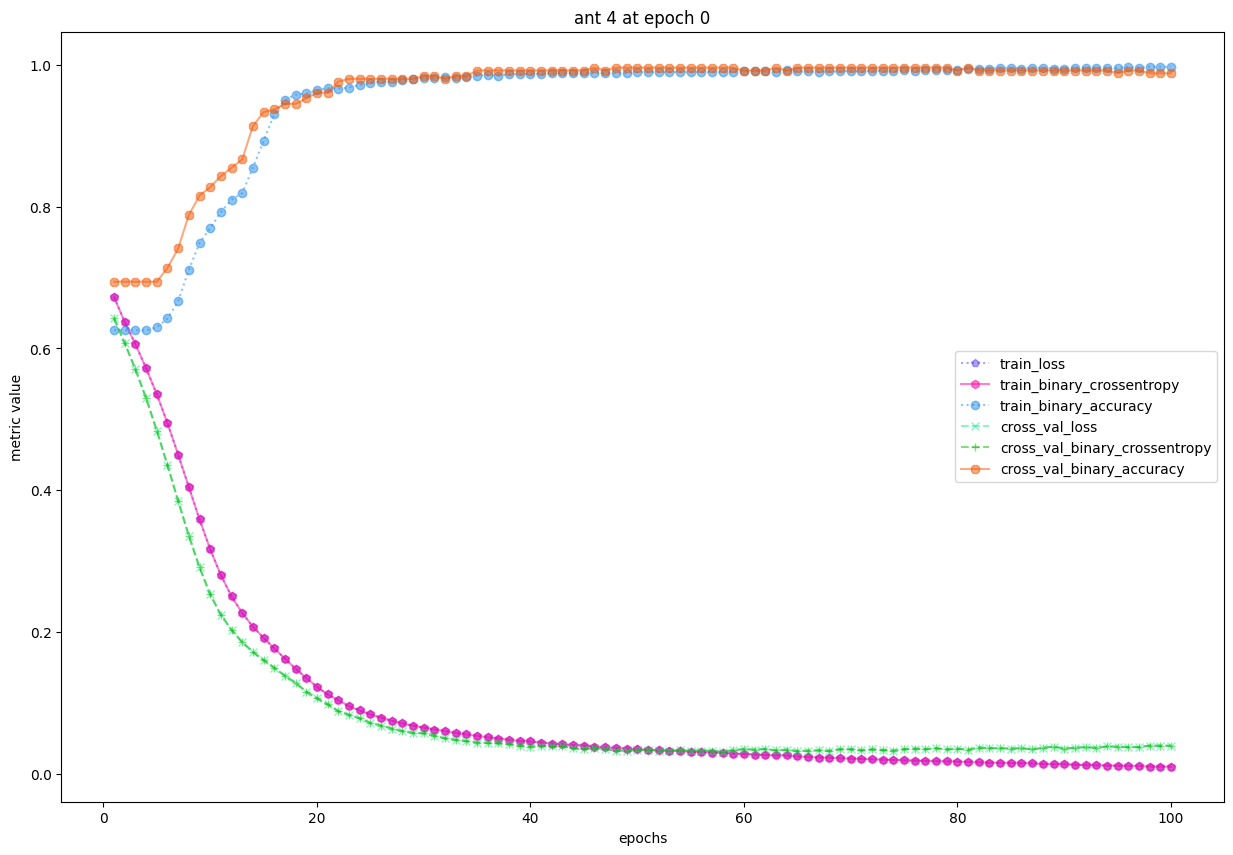

cost: 0.01888269634606938

selected paths: [16, 7, 18, 25, 26, 6, 0, 2, 19, 15, 11, 14, 29, 20, 27]

features selected: Int64Index([16, 7, 18, 25, 26, 6, 0, 2, 19, 15, 11, 14, 29, 20, 27], dtype='int64')

(398, 15)
(398, 1)
(85, 15)
(85, 1)
     concavity_se  concave points_mean  symmetry_se  compactness_worst  \
478      0.320505            -0.753936    -0.255754          -0.338840   
303     -0.458022            -0.802687    -0.318715          -0.953351   
155     -0.396350            -0.660562    -0.309029          -0.480063   
186     -0.589324             0.237843    -1.192902          -0.062119   
101     -1.057501            -1.261820     0.732247          -0.852841   
..            ...                  ...          ...                ...   
277     -0.187792             0.245323    -0.150416          -0.879559   
9        1.509848             0.941760    -0.321136           5.112877   
359     -0.278974            -0.899156    -0.135886          -0.950170   
192     -1.057501  

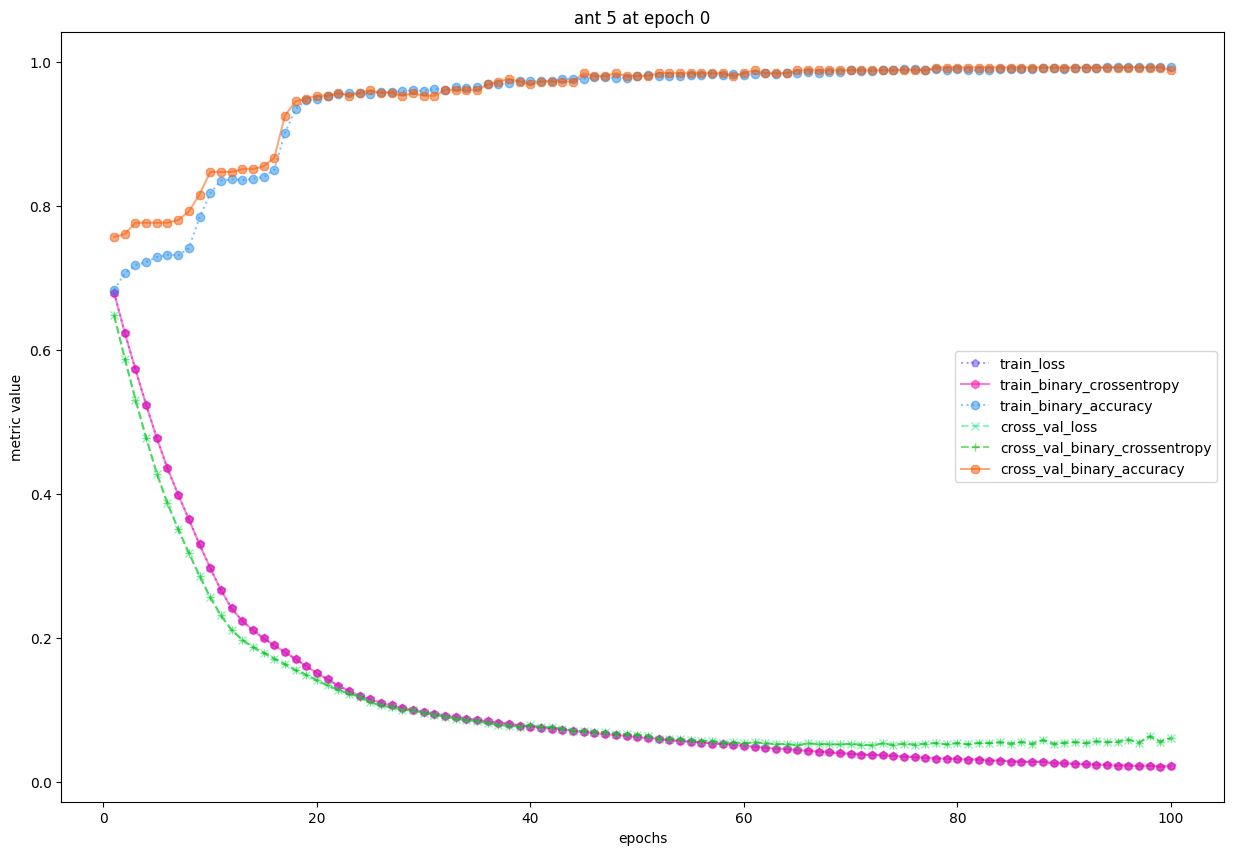

cost: 0.03311694419632356

selected paths: [11, 5, 3, 20, 13, 4, 29, 15, 10, 22, 1, 26, 18, 21, 27]

features selected: Int64Index([11, 5, 3, 20, 13, 4, 29, 15, 10, 22, 1, 26, 18, 21, 27], dtype='int64')

(398, 15)
(398, 1)
(85, 15)
(85, 1)
     texture_se  compactness_mean  area_mean  radius_worst   area_se  \
478   -0.092266         -0.418088  -0.710995     -0.801242 -0.571980   
303    0.628029         -0.711836  -0.911788     -1.078732 -0.665707   
155   -0.425561         -0.711647  -0.553431     -0.554813 -0.524236   
186   -1.344707         -0.372605   1.098139      1.043864 -0.251195   
101    0.528240         -0.543168  -1.454443     -1.726901 -0.671142   
..          ...               ...        ...           ...       ...   
277   -0.705514         -0.862311   1.271629      0.764302 -0.079142   
9      0.693345          2.563358  -0.509063     -0.244190 -0.360764   
359    0.054696         -0.848666  -1.070205     -0.879933 -0.216873   
192    6.655279         -1.533193  -1.0

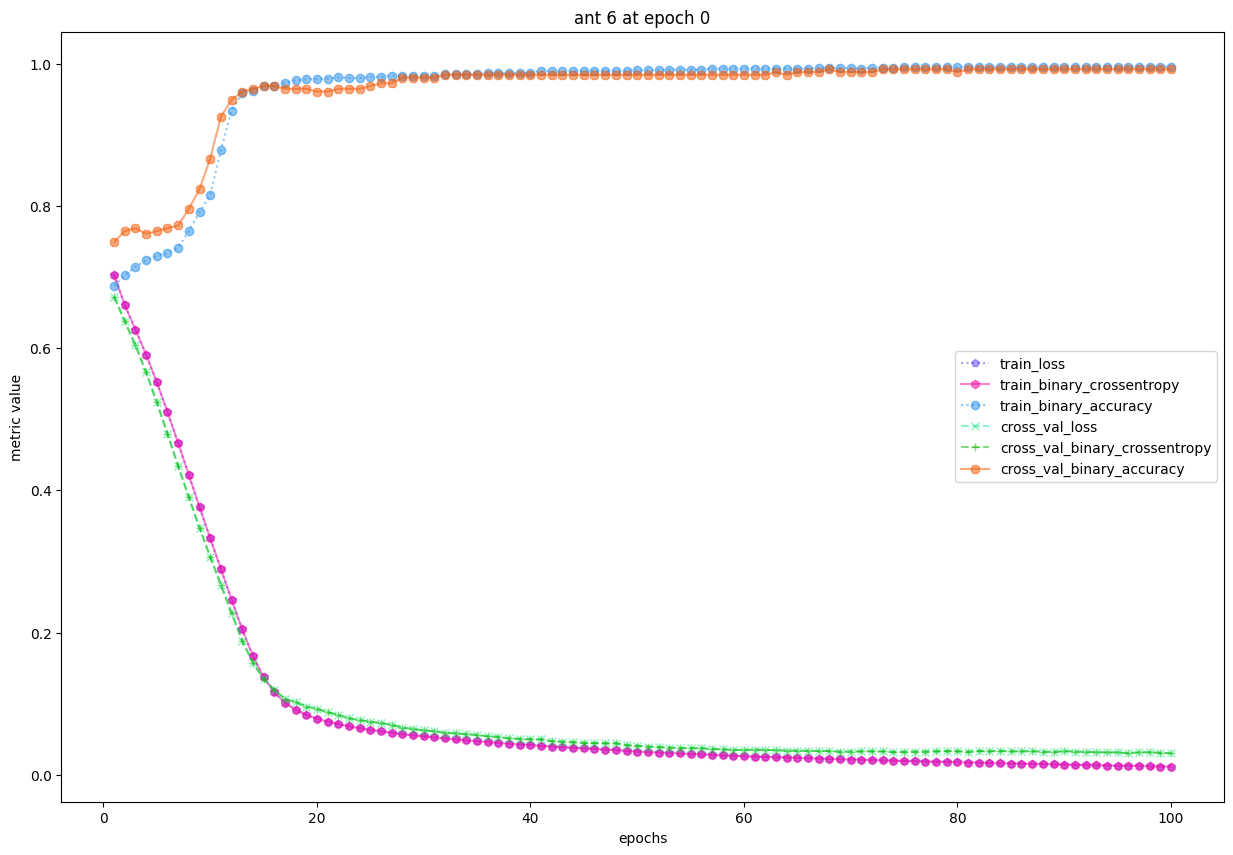

cost: 0.017008798010647298

selected paths: [7, 9, 18, 22, 0, 17, 25, 6, 27, 11, 14, 15, 24, 21, 19]

features selected: Int64Index([7, 9, 18, 22, 0, 17, 25, 6, 27, 11, 14, 15, 24, 21, 19], dtype='int64')

(398, 15)
(398, 1)
(85, 15)
(85, 1)
     concave points_mean  fractal_dimension_mean  symmetry_se  \
478            -0.753936                0.417114    -0.255754   
303            -0.802687                0.453972    -0.318715   
155            -0.660562               -0.073377    -0.309029   
186             0.237843               -1.211713    -1.192902   
101            -1.261820                2.180614     0.732247   
..                   ...                     ...          ...   
277             0.245323               -1.819865    -0.150416   
9               0.941760                2.783096    -0.321136   
359            -0.899156                0.962892    -0.135886   
192            -1.261820                0.237079     2.112542   
559            -0.202977                0.4

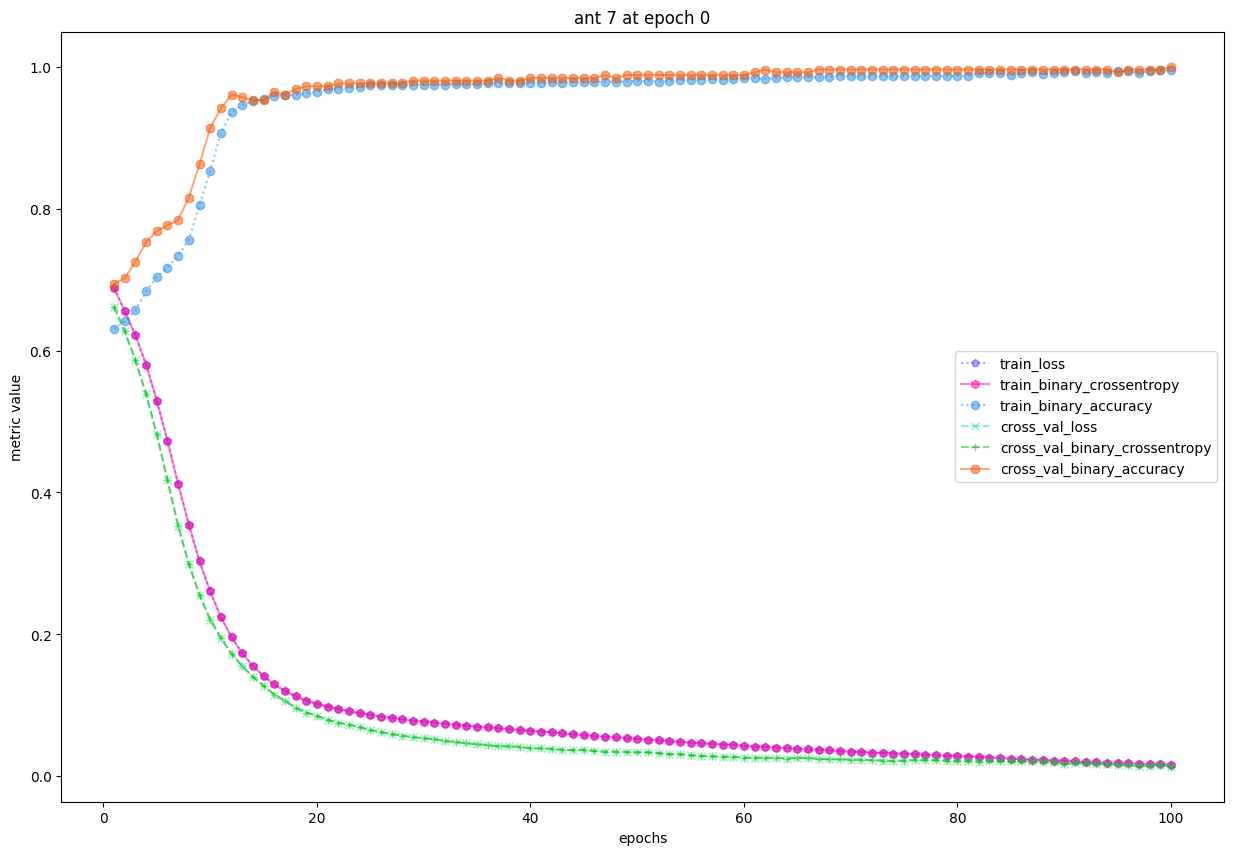

cost: 0.015262790226067106

selected paths: [26, 12, 4, 10, 7, 2, 24, 22, 18, 0, 23, 8, 16, 5, 13]

features selected: Int64Index([26, 12, 4, 10, 7, 2, 24, 22, 18, 0, 23, 8, 16, 5, 13], dtype='int64')

(398, 15)
(398, 1)
(85, 15)
(85, 1)
     concavity_worst  perimeter_se  smoothness_mean  radius_se  \
478        -0.060394     -0.643074         0.586383  -0.728238   
303        -0.901735     -0.906430         0.742947  -0.926383   
155        -0.373672     -0.684162        -0.698865  -0.668325   
186         0.391533     -0.519316        -0.745834  -0.532258   
101        -1.305831     -0.650005         1.468835  -0.653527   
..               ...           ...              ...        ...   
277        -0.245578     -0.249030        -0.507430  -0.277447   
9           3.995433     -0.409420         1.582699  -0.388250   
359        -0.756994      0.198478         0.323071   0.370767   
192        -1.305831     -0.314869        -1.911524  -0.185052   
559         0.435670     -0.460408  

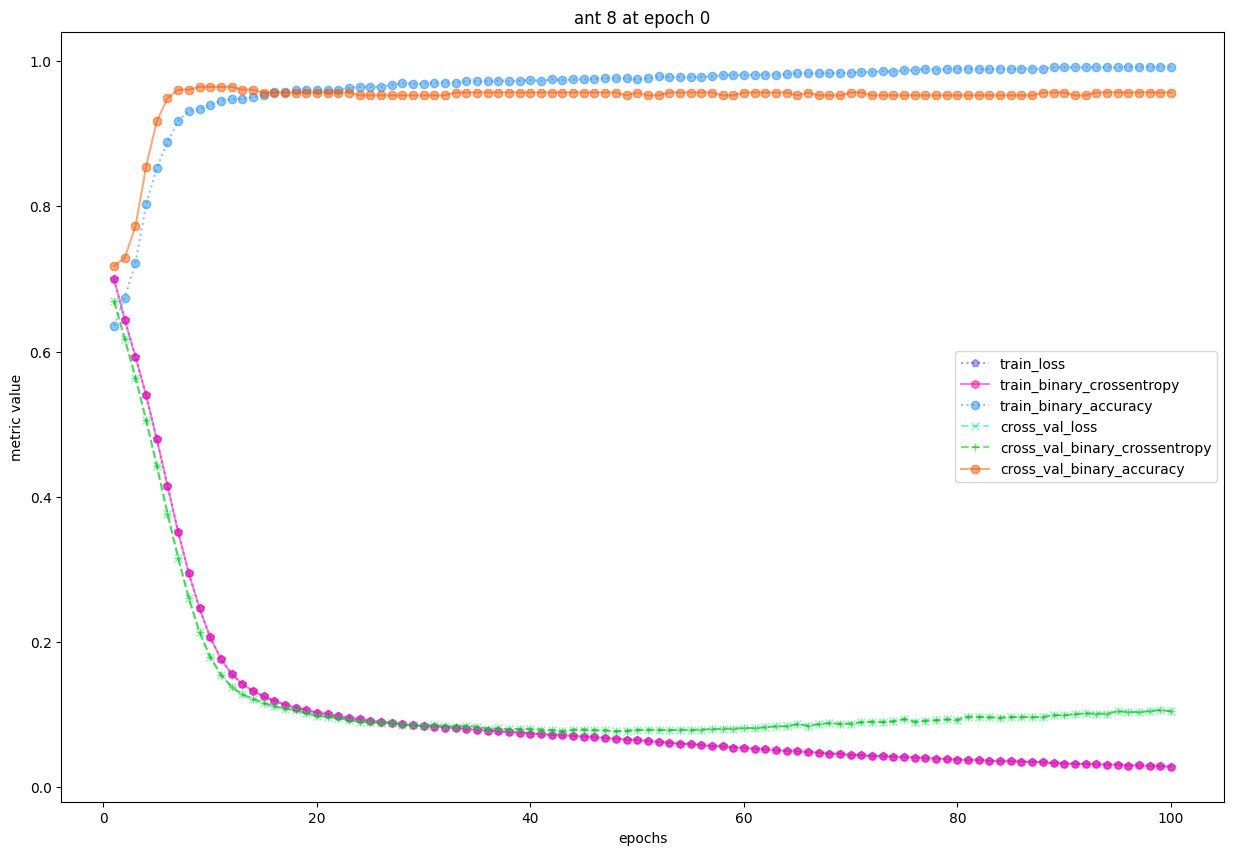

cost: 0.05075828693807125

selected paths: [21, 24, 2, 3, 9, 26, 16, 22, 15, 17, 12, 18, 14, 19, 27]

features selected: Int64Index([21, 24, 2, 3, 9, 26, 16, 22, 15, 17, 12, 18, 14, 19, 27], dtype='int64')

(398, 15)
(398, 1)
(85, 15)
(85, 1)
     texture_worst  smoothness_worst  perimeter_mean  area_mean  \
478      -0.615097          0.124117       -0.740560  -0.710995   
303      -0.185190          0.391516       -1.034246  -0.911788   
155      -0.074456         -0.467667       -0.564266  -0.553431   
186       0.111186         -0.393146        1.096935   1.098139   
101      -0.999409          1.141110       -1.984504  -1.454443   
..             ...               ...             ...        ...   
277      -0.224272         -0.353694        1.191672   1.271629   
9         2.443109          2.320295       -0.329482  -0.509063   
359      -0.107025          0.040829       -1.324225  -1.070205   
192      -0.789340         -2.682695       -1.286742  -1.043186   
559       1.869899  

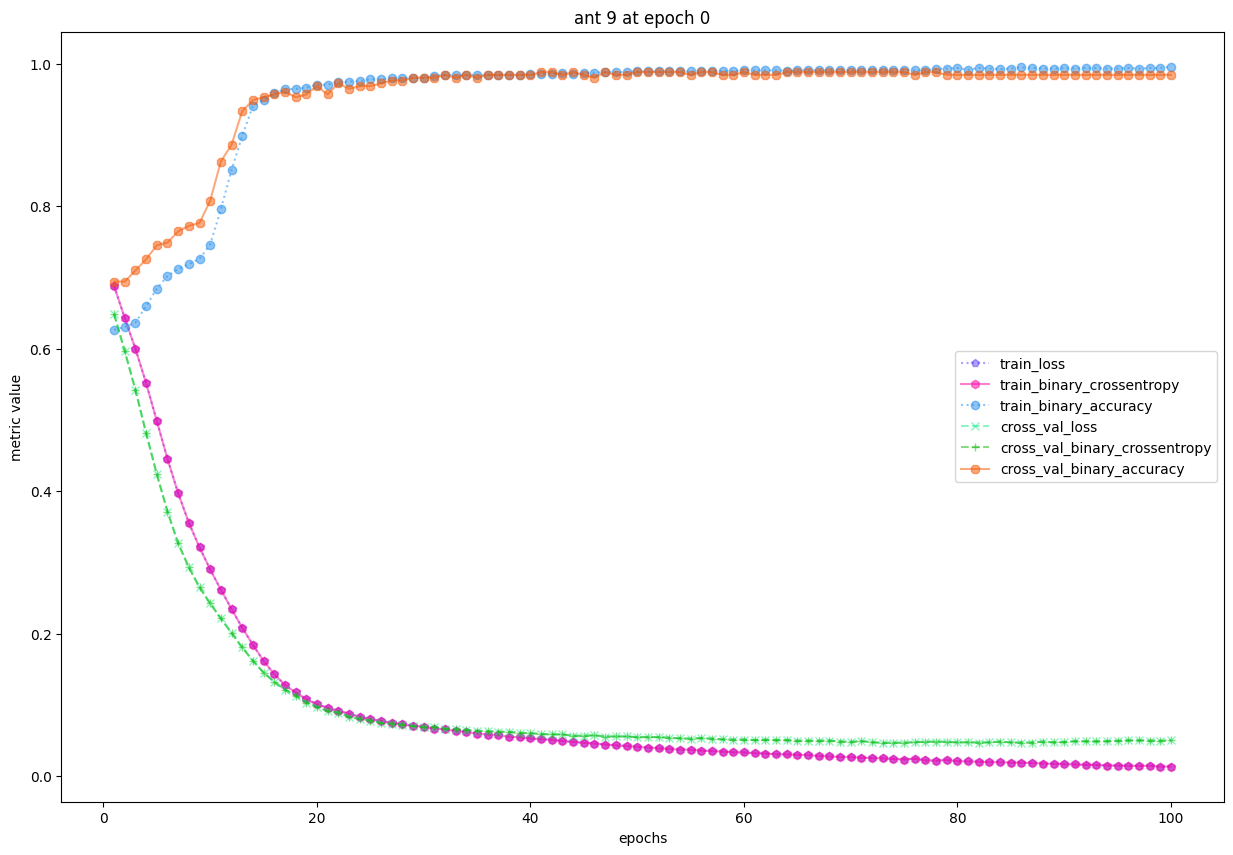

cost: 0.02449242214982708

selected paths: [8, 19, 27, 28, 0, 9, 17, 6, 5, 3, 7, 25, 29, 12, 4]

features selected: Int64Index([8, 19, 27, 28, 0, 9, 17, 6, 5, 3, 7, 25, 29, 12, 4], dtype='int64')

(398, 15)
(398, 1)
(85, 15)
(85, 1)
     symmetry_mean  fractal_dimension_se  concave points_worst  \
478      -0.119089             -0.068427             -0.613574   
303      -1.203419             -0.180768             -0.751071   
155       0.578241             -0.495851             -0.494807   
186      -0.695938             -1.024268              0.647036   
101       0.432204              0.115403             -1.745063   
..             ...                   ...                   ...   
277      -0.955155             -0.801478              0.225259   
9         0.797298              2.377346              1.620015   
359      -1.115796             -0.409232             -0.975815   
192      -0.579108             -0.796939             -1.745063   
559      -1.546608              0.356727 

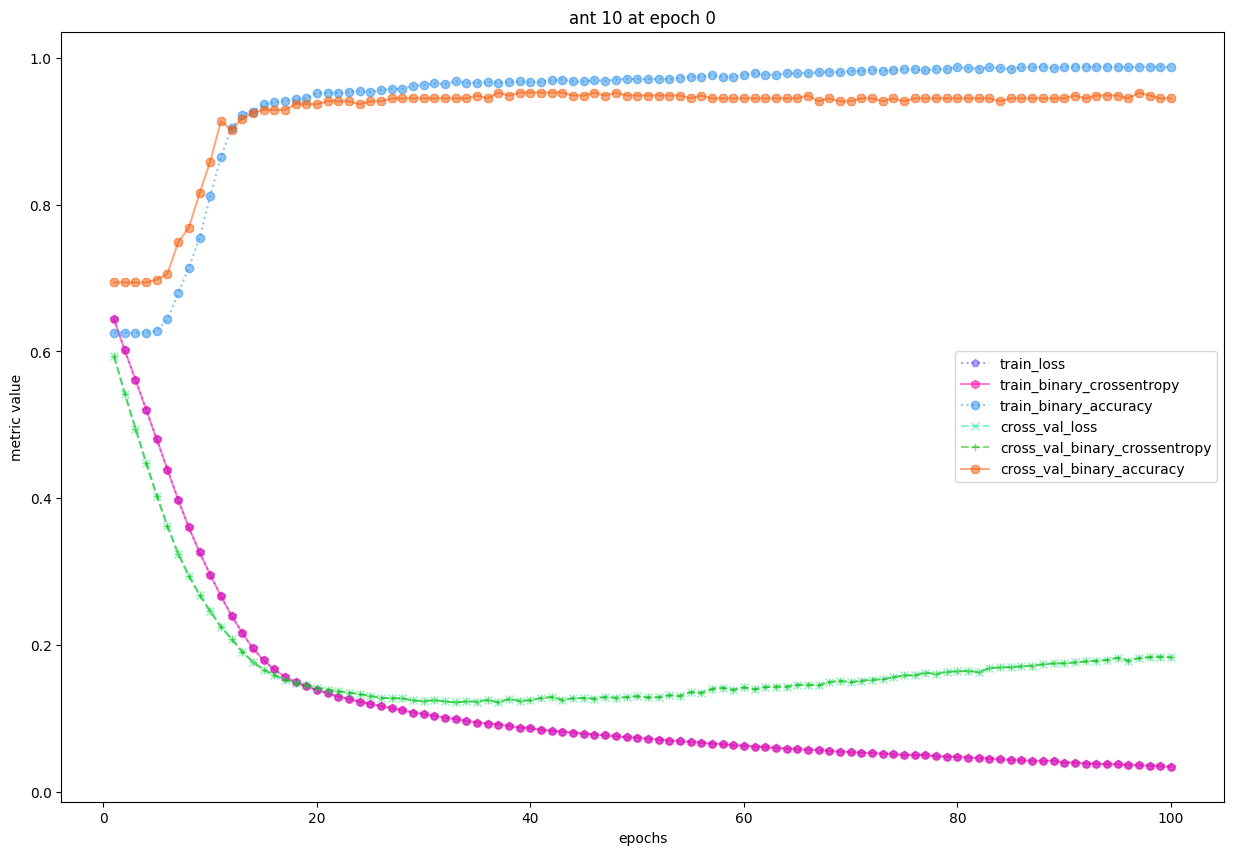

cost: 0.07859570210178694

selected paths: [3, 19, 15, 24, 9, 5, 8, 16, 17, 28, 10, 23, 14, 4, 25]

features selected: Int64Index([3, 19, 15, 24, 9, 5, 8, 16, 17, 28, 10, 23, 14, 4, 25], dtype='int64')

(398, 15)
(398, 1)
(85, 15)
(85, 1)
     area_mean  fractal_dimension_se  compactness_se  smoothness_worst  \
478  -0.710995             -0.068427       -0.242457          0.124117   
303  -0.911788             -0.180768       -0.900724          0.391516   
155  -0.553431             -0.495851       -0.550967         -0.467667   
186   1.098139             -1.024268       -0.910840         -0.393146   
101  -1.454443              0.115403       -0.818119          1.141110   
..         ...                   ...             ...               ...   
277   1.271629             -0.801478       -0.801352         -0.353694   
9    -0.509063              2.377346        2.609587          2.320295   
359  -1.070205             -0.409232       -0.921962          0.040829   
192  -1.043186       

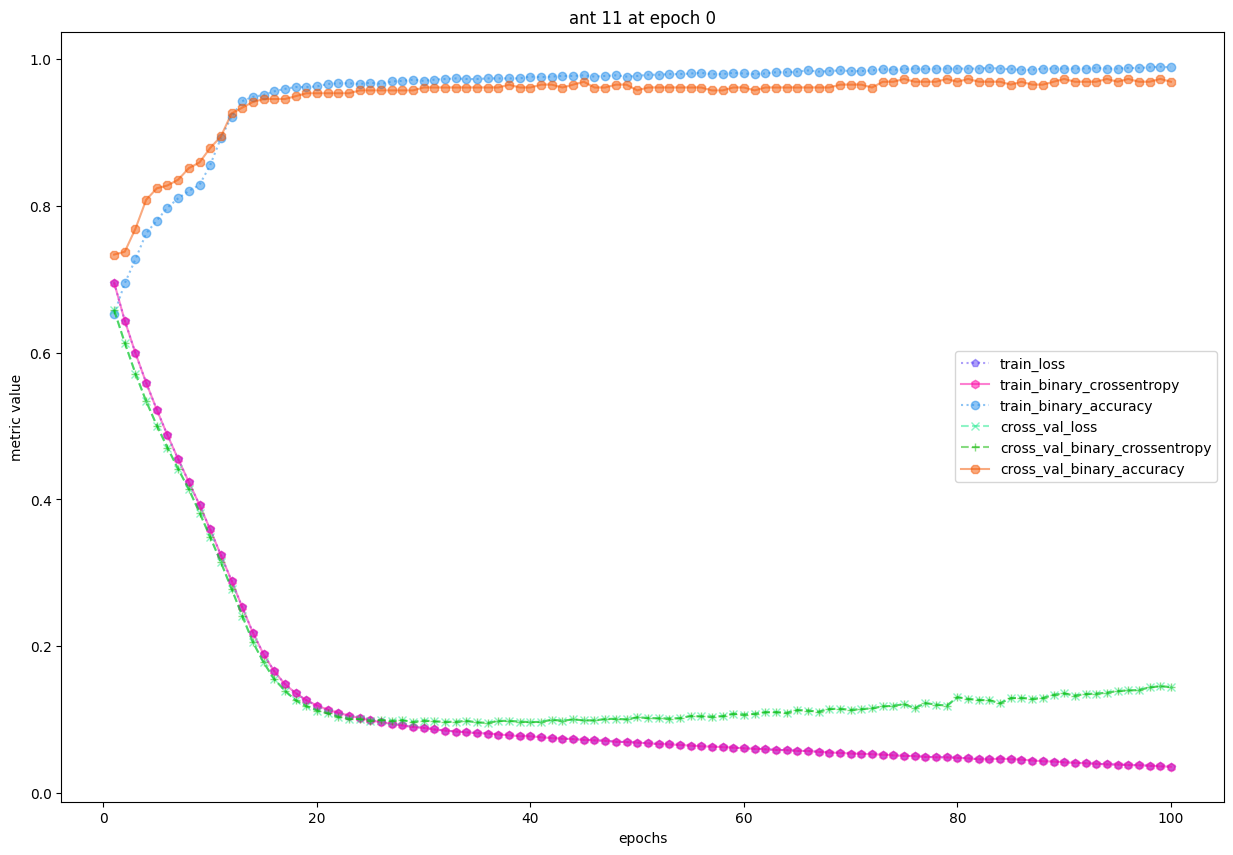

cost: 0.06856865075727304

selected paths: [21, 25, 6, 22, 5, 20, 1, 17, 11, 8, 28, 18, 4, 3, 12]

features selected: Int64Index([21, 25, 6, 22, 5, 20, 1, 17, 11, 8, 28, 18, 4, 3, 12], dtype='int64')

(398, 15)
(398, 1)
(85, 15)
(85, 1)
     texture_worst  compactness_worst  concavity_mean  perimeter_worst  \
478      -0.615097          -0.338840       -0.448455        -0.751235   
303      -0.185190          -0.953351       -0.826485        -1.087219   
155      -0.074456          -0.480063       -0.627112        -0.615412   
186       0.111186          -0.062119       -0.089257         0.951324   
101      -0.999409          -0.852841       -1.114873        -1.693361   
..             ...                ...             ...              ...   
277      -0.224272          -0.879559       -0.107964         0.647508   
9         2.443109           5.112877        1.738872        -0.286278   
359      -0.107025          -0.950170       -0.774633        -0.937396   
192      -0.789340     

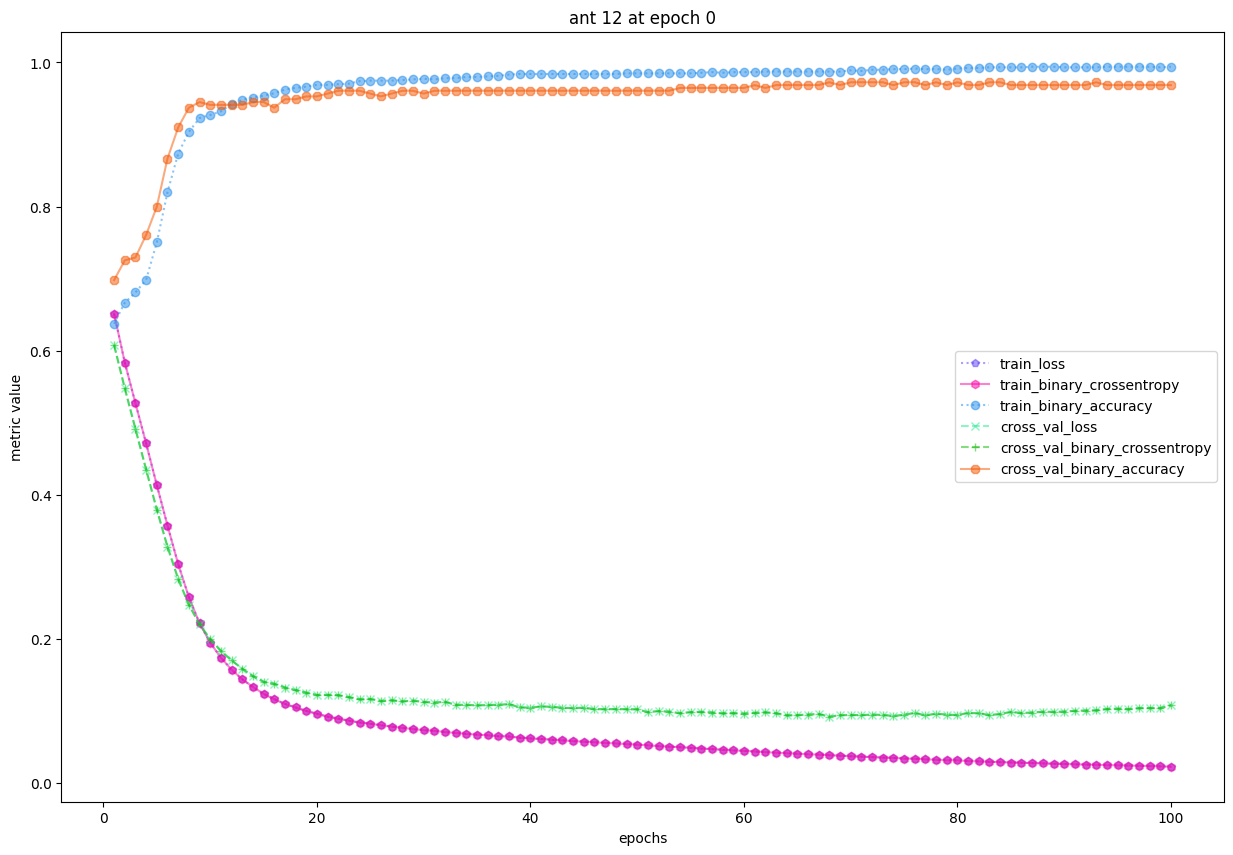

cost: 0.048358577334632474

selected paths: [23, 13, 21, 27, 1, 29, 5, 6, 3, 10, 22, 20, 9, 11, 24]

features selected: Int64Index([23, 13, 21, 27, 1, 29, 5, 6, 3, 10, 22, 20, 9, 11, 24], dtype='int64')

(398, 15)
(398, 1)
(85, 15)
(85, 1)
     area_worst   area_se  texture_worst  concave points_worst  texture_mean  \
478   -0.725988 -0.571980      -0.615097             -0.613574     -1.093640   
303   -0.888068 -0.665707      -0.185190             -0.751071     -0.158159   
155   -0.556174 -0.524236      -0.074456             -0.494807     -0.314072   
186    0.930669 -0.251195       0.111186              0.647036     -0.165140   
101   -1.222423 -0.671142      -0.999409             -1.745063     -1.363580   
..          ...       ...            ...                   ...           ...   
277    0.624792 -0.079142      -0.224272              0.225259      0.160649   
9     -0.297409 -0.360764       2.443109              1.620015      1.105439   
359   -0.775210 -0.216873      -0.107025

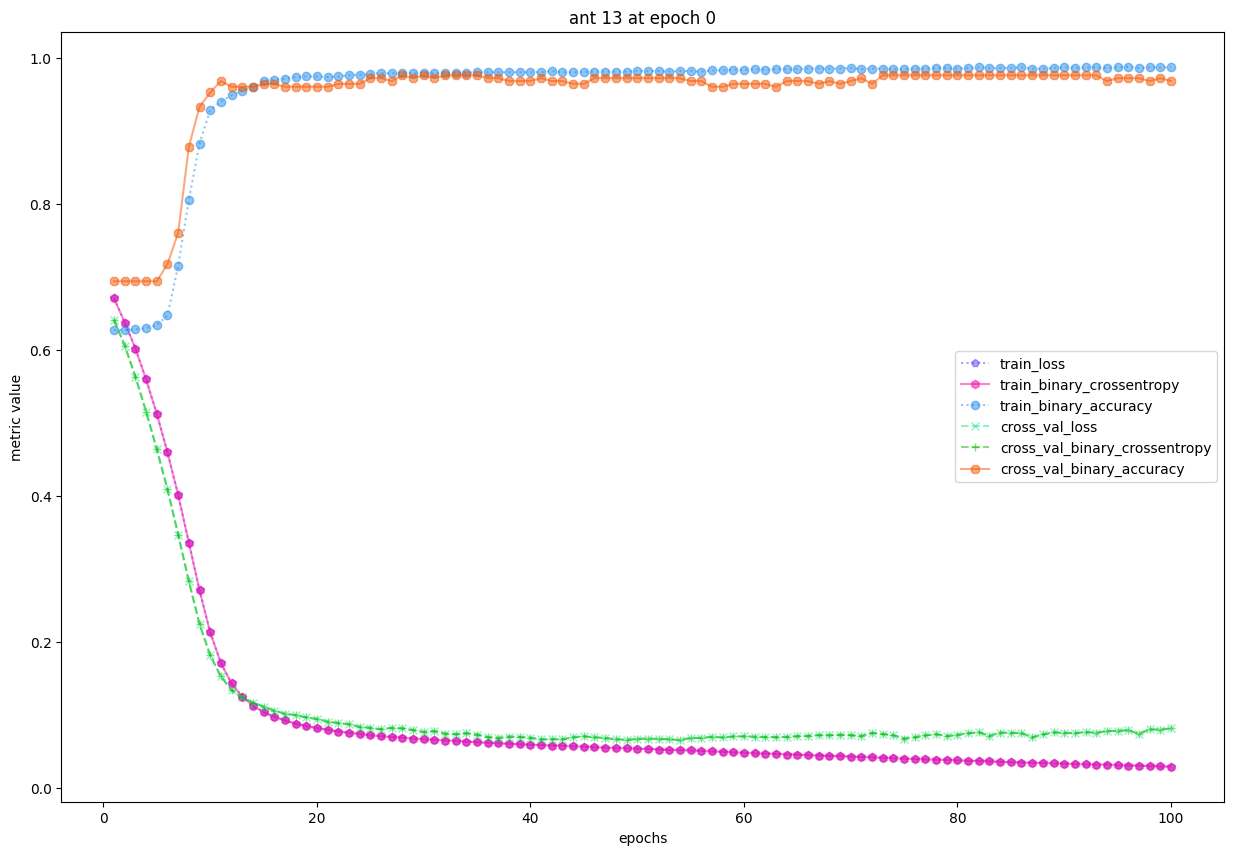

cost: 0.04436677029977242

selected paths: [12, 24, 26, 19, 29, 22, 9, 21, 3, 6, 15, 0, 1, 13, 25]

features selected: Int64Index([12, 24, 26, 19, 29, 22, 9, 21, 3, 6, 15, 0, 1, 13, 25], dtype='int64')

(398, 15)
(398, 1)
(85, 15)
(85, 1)
     perimeter_se  smoothness_worst  concavity_worst  fractal_dimension_se  \
478     -0.643074          0.124117        -0.060394             -0.068427   
303     -0.906430          0.391516        -0.901735             -0.180768   
155     -0.684162         -0.467667        -0.373672             -0.495851   
186     -0.519316         -0.393146         0.391533             -1.024268   
101     -0.650005          1.141110        -1.305831              0.115403   
..            ...               ...              ...                   ...   
277     -0.249030         -0.353694        -0.245578             -0.801478   
9       -0.409420          2.320295         3.995433              2.377346   
359      0.198478          0.040829        -0.756994       

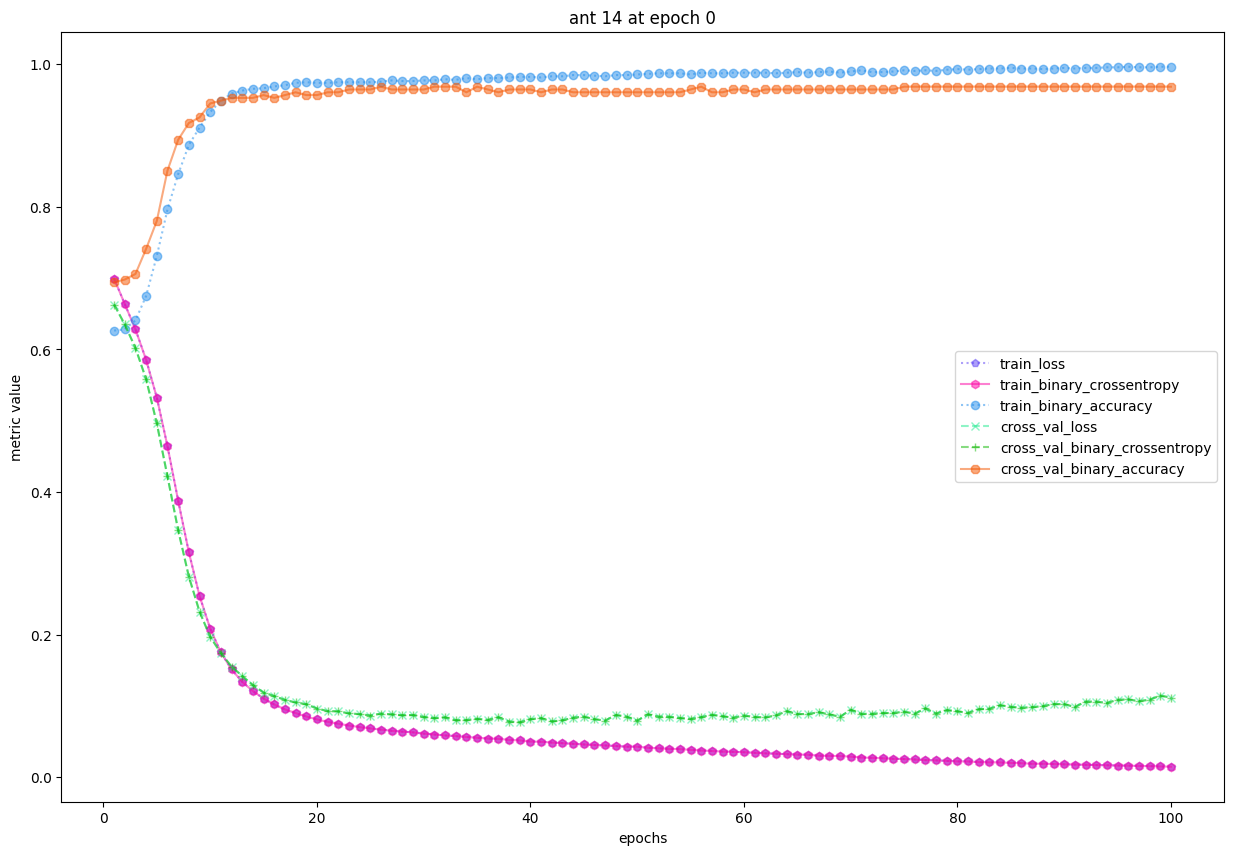

cost: 0.04359977024917802

selected paths: [22, 20, 12, 24, 19, 1, 10, 14, 27, 18, 5, 6, 21, 17, 4]

features selected: Int64Index([22, 20, 12, 24, 19, 1, 10, 14, 27, 18, 5, 6, 21, 17, 4], dtype='int64')

(398, 15)
(398, 1)
(85, 15)
(85, 1)
     perimeter_worst  radius_worst  perimeter_se  smoothness_worst  \
478        -0.751235     -0.801242     -0.643074          0.124117   
303        -1.087219     -1.078732     -0.906430          0.391516   
155        -0.615412     -0.554813     -0.684162         -0.467667   
186         0.951324      1.043864     -0.519316         -0.393146   
101        -1.693361     -1.726901     -0.650005          1.141110   
..               ...           ...           ...               ...   
277         0.647508      0.764302     -0.249030         -0.353694   
9          -0.286278     -0.244190     -0.409420          2.320295   
359        -0.937396     -0.879933      0.198478          0.040829   
192        -1.340697     -1.304866     -0.314869         -2

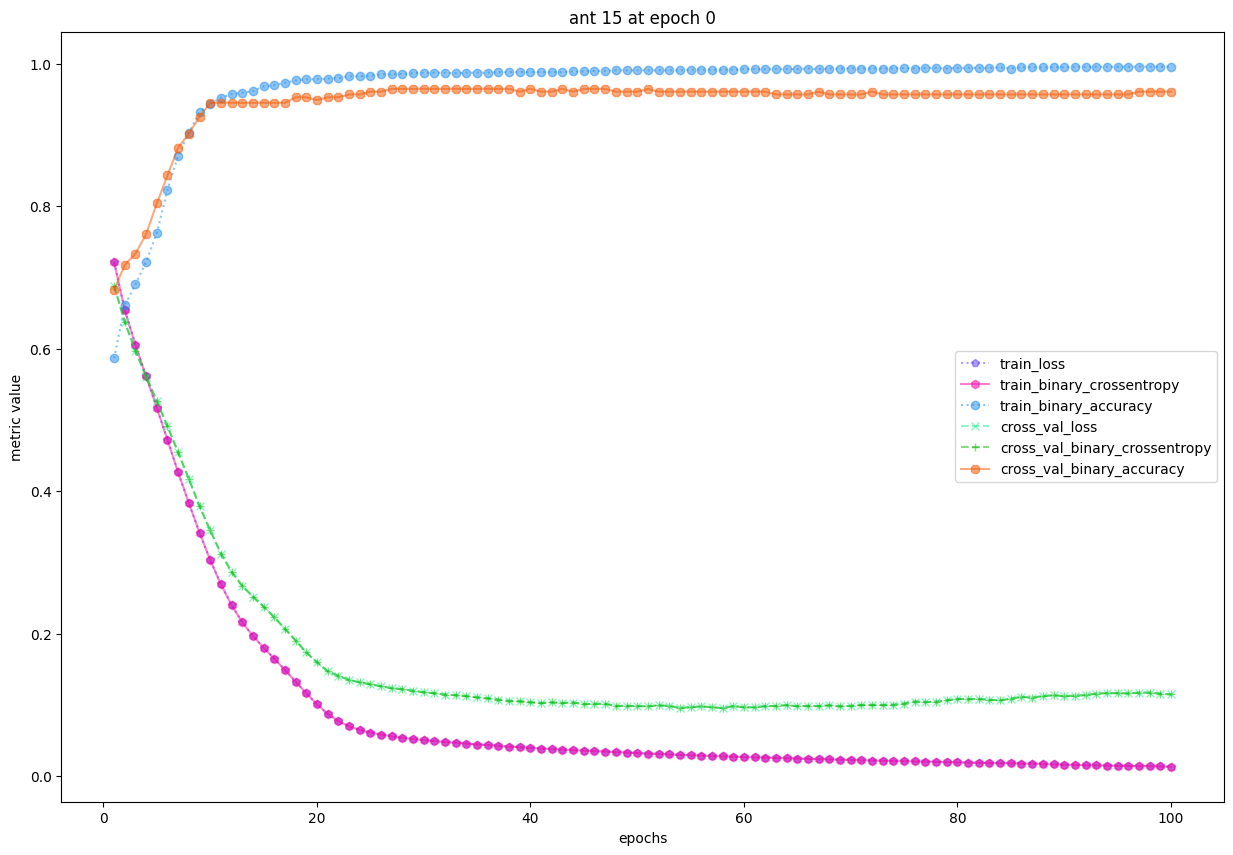

cost: 0.043423053544635576

selected paths: [27, 12, 14, 20, 19, 7, 11, 29, 5, 9, 16, 26, 2, 21, 0]

features selected: Int64Index([27, 12, 14, 20, 19, 7, 11, 29, 5, 9, 16, 26, 2, 21, 0], dtype='int64')

(398, 15)
(398, 1)
(85, 15)
(85, 1)
     concave points_worst  perimeter_se  smoothness_se  radius_worst  \
478             -0.613574     -0.643074      -0.694688     -0.801242   
303             -0.751071     -0.906430       0.611365     -1.078732   
155             -0.494807     -0.684162      -0.507680     -0.554813   
186              0.647036     -0.519316      -1.391716      1.043864   
101             -1.745063     -0.650005       1.049716     -1.726901   
..                    ...           ...            ...           ...   
277              0.225259     -0.249030       0.176681      0.764302   
9                1.620015     -0.409420       0.036008     -0.244190   
359             -0.975815      0.198478      -0.068329     -0.879933   
192             -1.745063     -0.314869 

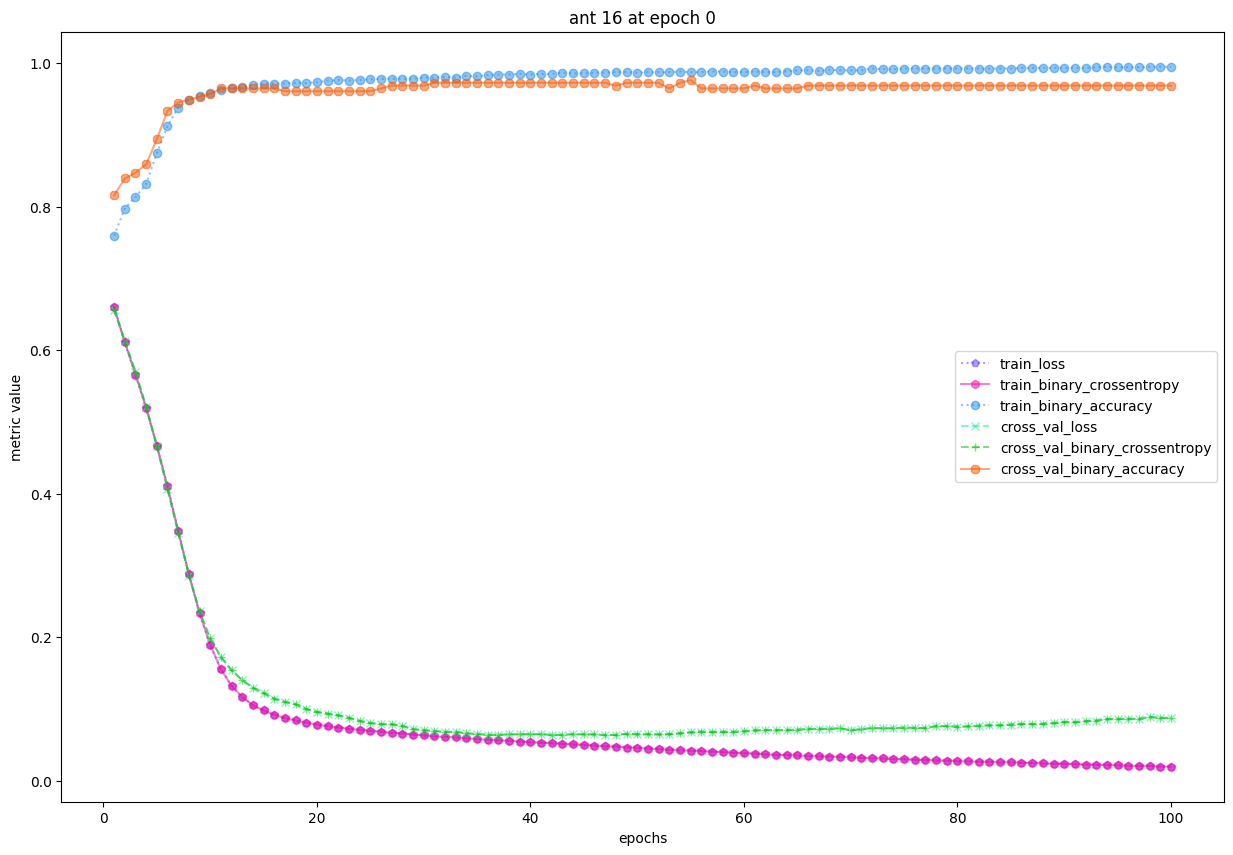

cost: 0.03994010469565789

selected paths: [12, 15, 5, 19, 18, 4, 8, 2, 28, 17, 24, 14, 1, 23, 25]

features selected: Int64Index([12, 15, 5, 19, 18, 4, 8, 2, 28, 17, 24, 14, 1, 23, 25], dtype='int64')

(398, 15)
(398, 1)
(85, 15)
(85, 1)
     perimeter_se  compactness_se  compactness_mean  fractal_dimension_se  \
478     -0.643074       -0.242457         -0.418088             -0.068427   
303     -0.906430       -0.900724         -0.711836             -0.180768   
155     -0.684162       -0.550967         -0.711647             -0.495851   
186     -0.519316       -0.910840         -0.372605             -1.024268   
101     -0.650005       -0.818119         -0.543168              0.115403   
..            ...             ...               ...                   ...   
277     -0.249030       -0.801352         -0.862311             -0.801478   
9       -0.409420        2.609587          2.563358              2.377346   
359      0.198478       -0.921962         -0.848666             -0.4

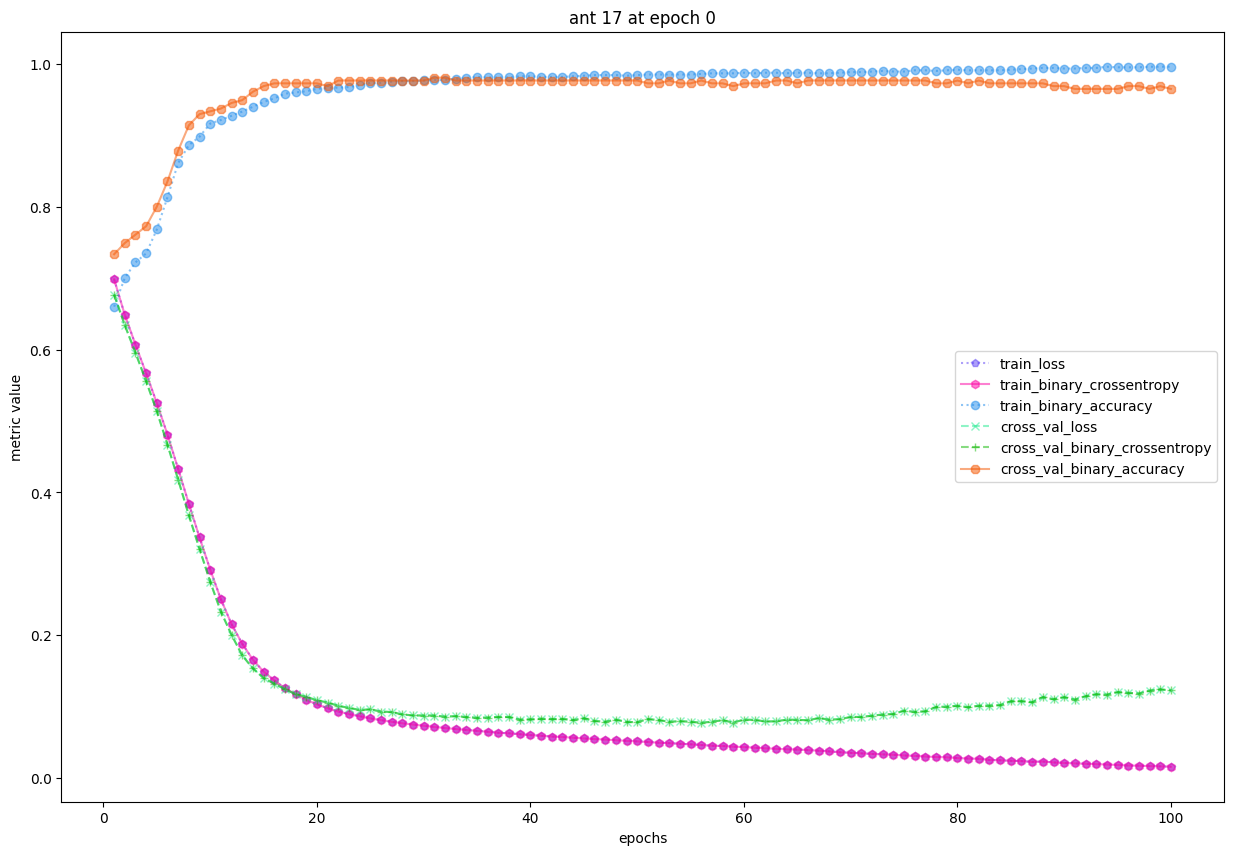

cost: 0.048120040725916635

selected paths: [22, 23, 10, 16, 11, 9, 7, 26, 20, 15, 25, 3, 8, 27, 18]

features selected: Int64Index([22, 23, 10, 16, 11, 9, 7, 26, 20, 15, 25, 3, 8, 27, 18], dtype='int64')

(398, 15)
(398, 1)
(85, 15)
(85, 1)
     perimeter_worst  area_worst  radius_se  concavity_se  texture_se  \
478        -0.751235   -0.725988  -0.728238      0.320505   -0.092266   
303        -1.087219   -0.888068  -0.926383     -0.458022    0.628029   
155        -0.615412   -0.556174  -0.668325     -0.396350   -0.425561   
186         0.951324    0.930669  -0.532258     -0.589324   -1.344707   
101        -1.693361   -1.222423  -0.653527     -1.057501    0.528240   
..               ...         ...        ...           ...         ...   
277         0.647508    0.624792  -0.277447     -0.187792   -0.705514   
9          -0.286278   -0.297409  -0.388250      1.509848    0.693345   
359        -0.937396   -0.775210   0.370767     -0.278974    0.054696   
192        -1.340697   -1.01

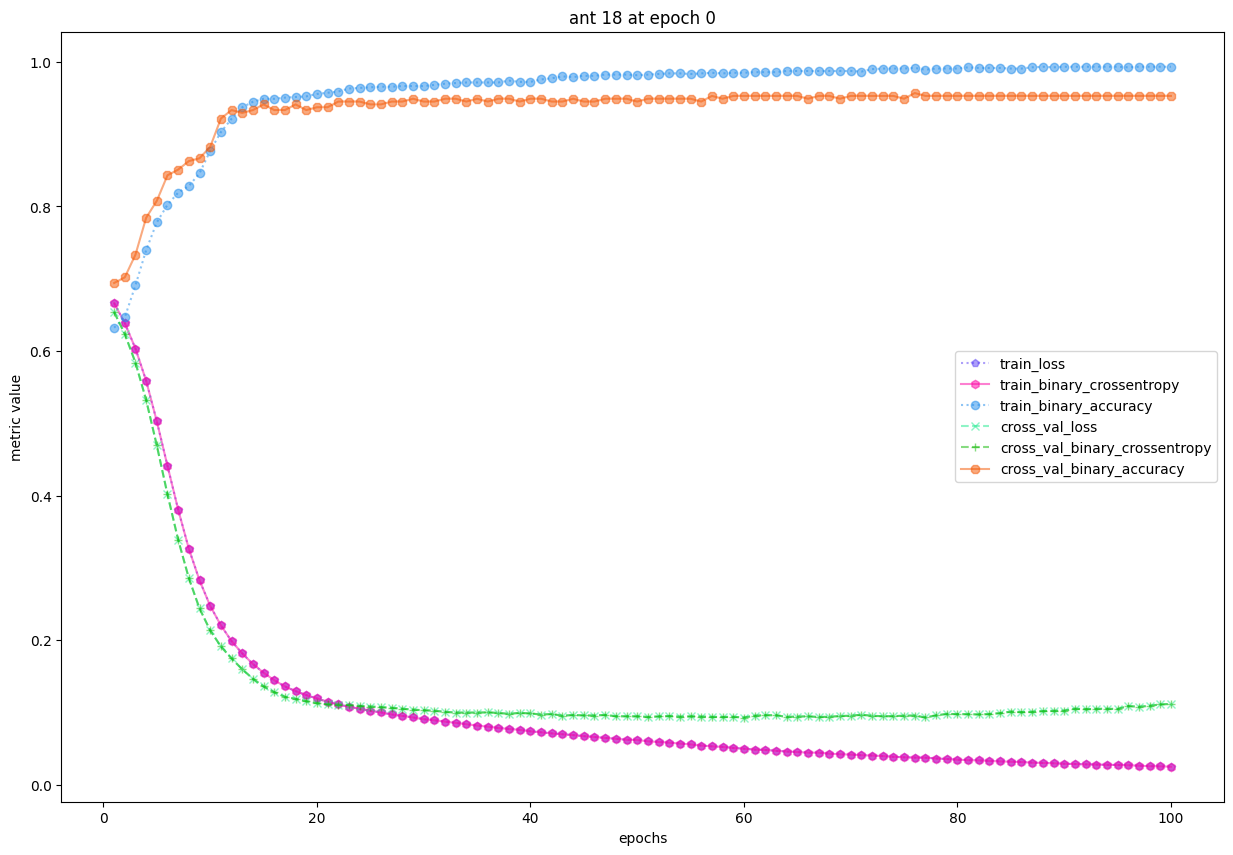

cost: 0.05103875761851668

selected paths: [25, 27, 26, 15, 23, 19, 6, 9, 18, 7, 1, 22, 11, 0, 3]

features selected: Int64Index([25, 27, 26, 15, 23, 19, 6, 9, 18, 7, 1, 22, 11, 0, 3], dtype='int64')

(398, 15)
(398, 1)
(85, 15)
(85, 1)
     compactness_worst  concave points_worst  concavity_worst  compactness_se  \
478          -0.338840             -0.613574        -0.060394       -0.242457   
303          -0.953351             -0.751071        -0.901735       -0.900724   
155          -0.480063             -0.494807        -0.373672       -0.550967   
186          -0.062119              0.647036         0.391533       -0.910840   
101          -0.852841             -1.745063        -1.305831       -0.818119   
..                 ...                   ...              ...             ...   
277          -0.879559              0.225259        -0.245578       -0.801352   
9             5.112877              1.620015         3.995433        2.609587   
359          -0.950170            

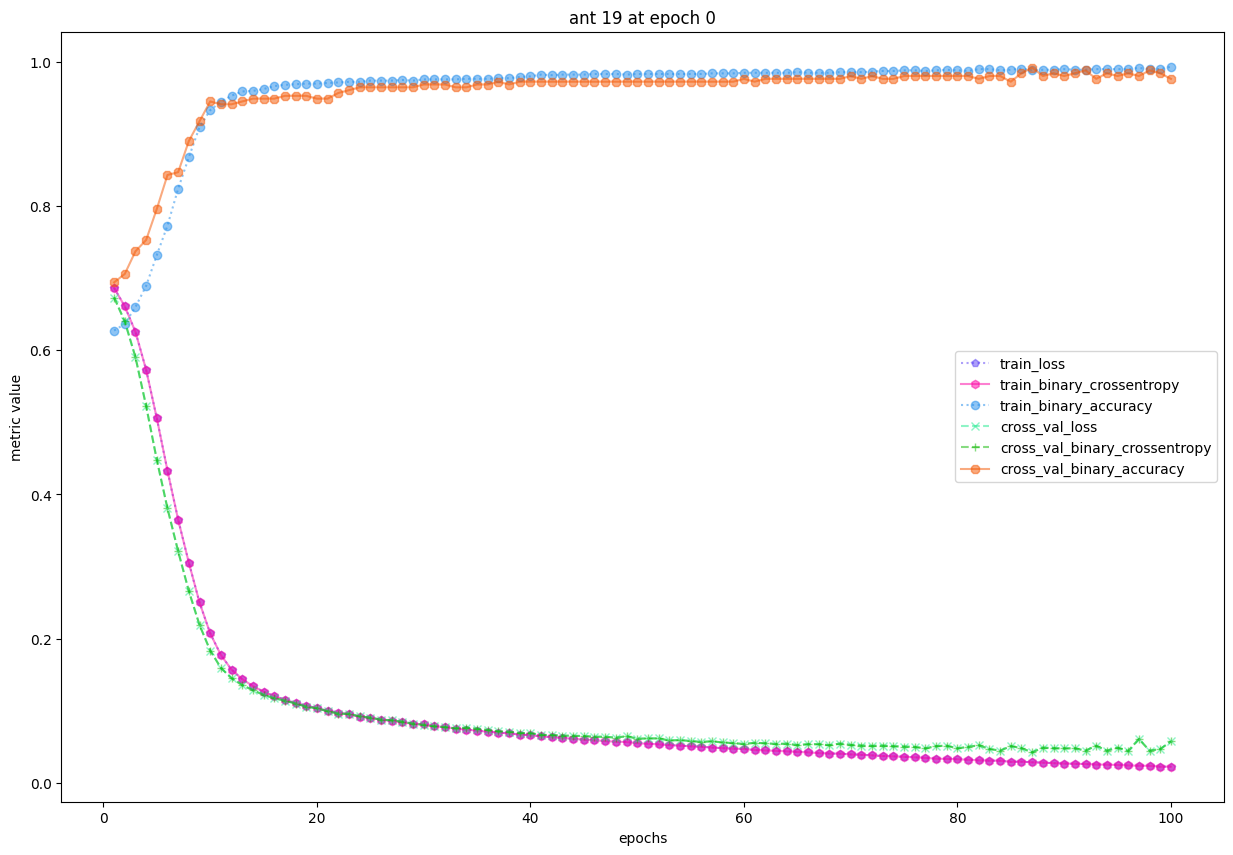

cost: 0.03287257434179386

0



In [5]:
colony = Colony(X.T, Y.T, epochs=80, num_ants=20)
best_ants = colony.run()

In [6]:
ant_at_0 = best_ants[0]
ant_at_0.tour

[25,
 10,
 22,
 3,
 28,
 7,
 15,
 24,
 17,
 13,
 1,
 14,
 26,
 18,
 0,
 29,
 11,
 16,
 23,
 8,
 9,
 20,
 21,
 6,
 12,
 5,
 19,
 4,
 2,
 27]